In [1]:
import irrigation30 as irr

# from irrigation30 import authenticate, Irrigation30

In [2]:
# help(irr)
# irr

<module 'irrigation30' from '/Users/Will/Desktop/mids/W210/MIDS_Capstone_Summer2020/package/irrigation30/__init__.py'>

In [3]:
# irr.authenticate()


In [4]:
# (lon, lat)
# [82.121452, 21.706688],     // C01 (India): Doesn't look quite right.
                                              # Agree; the division feel arbitrary; both matched precipitation trend though
# [-94.46643, 48.76297],      // C02 (Canada): S2-Q1+Q4 layer is white/black. "Satellite" looks better. Irrigation is okay.
# [-105.69772, 49.316722],    // C03 (Canada): SWAP OUT WITH IDAHO.
# [10.640815, 52.185072],     // C04 (Germany): Strange S2 layers, otherwise good result. Look at flip of cropland in Q2 and Q3! Irrigation seems to coincide with Q2. 
#                                             # (one in May and the other in July) One rainfed and one irrigation or both irrigation?
# [10.7584699, 52.2058339],   // C05 (Germany): Doesn't seem right. 
# [33.857852, 46.539389],     // C06 (Ukraine): WEIRD RESULT. S2 seasonal flip-flops (Q2 and Q3 flip flop, then Q4 confusion). NDVI peaks at different seasons for each cluster. Heuristic mismatch!
#                                             # Maybe both are irrgated but at different times (April, July, and October), 3 clusters?
# [36.58565, 47.0838],        // C07 (Ukraine): Looks okay?
# [38.34523, 30.22176],       // C08 (Saudi Arabia): Looks great. Although definitely depends on season.
# [-64.075199, -31.950112],   // C09 (Argentina): NEW. Irrigation labels make no sense. Clusters have almost identical signatures.
# [67.359826, 43.55412],      // C10 (Uzbekistan): Mostly good. Although clusters seem to select areas that peak at different seasons (Q2 vs Q3). 
# [-46.2607, -11.93067]       // C11 (Brazil): Tricky case. Mostly non-cropland. 
# [-116.736866, 43.771114]    // Idaho

In [8]:
# Adam's #1 (India): should be rainfed

# coord = [77.97976826, 15.8005146]
coord = [36.58565, 47.0838]

center_lat = coord[1] 
center_lon = coord[0]
edge_len = 0.05
num_clusters = 2
year = 2018

model = irr.Irrigation30(center_lat=center_lat, center_lon=center_lon, edge_len=edge_len, num_clusters=num_clusters, year=year)


The selected area is approximately 3.79 km by 5.56 km


In [9]:
%%time
model.fit_predict()

Model building...
Model complete!
CPU times: user 60.6 ms, sys: 2.43 ms, total: 63.1 ms
Wall time: 22.1 s


In [10]:
%%time
model.plot_map()

STARTING PLOT_MAP
ADDING PREDICTION LAYER
DONE - ADDING PREDICTION LAYER, 3.3396873315175375
ADDING S2 RGB Q LAYERS
DONE - ADDING S2 RGB Q LAYERS, 0.02818143367767334
ADDING G1000 LAYER
DONE - ADDING G1000 LAYER, 0.0648665984471639
ADDING 12 NDVI LAYERS
DONE - ADDING 12 NDVI LAYERS, 1.21880601644516
============ Prediction Layer Legend ============
Cluster 0 (red): 1-crop cycle annually | irrigated around Aug; 
Cluster 1 (blue): rainfed
============ GFSAD1000 Layer Legend ============
Croplands: irrigation major (green)
Croplands: irrigation minor (lighter green)
Croplands: rainfed (yellow)
Croplands: rainfed, minor fragments (yellow orange)
Croplands: rainfed, rainfed, very minor fragments (orange)
CPU times: user 159 ms, sys: 34.6 ms, total: 194 ms
Wall time: 4min 39s


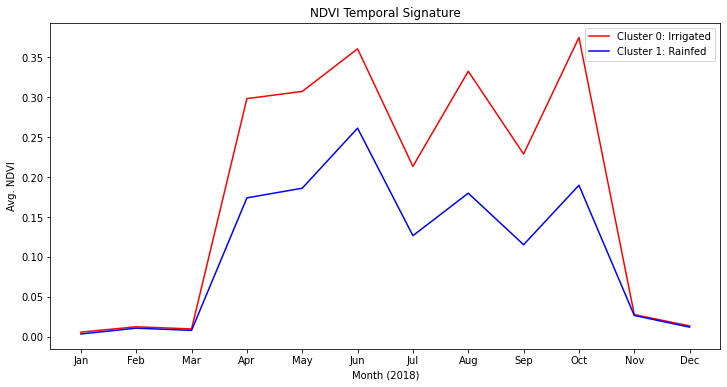

In [11]:
model.plot_avg_ndvi()

CPU times: user 18.4 ms, sys: 2.2 ms, total: 20.6 ms
Wall time: 18.8 ms


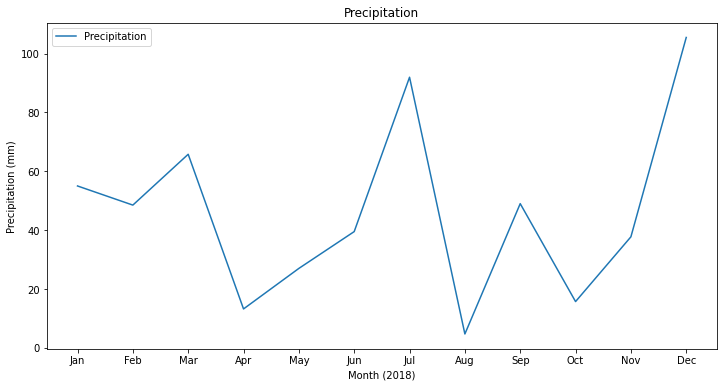

In [12]:
%%time
model.plot_precipitation()
# peak but too low? 800~600/4 = 200, at least 100mm. 5-6mm per day
# Precipitation for AUS is sometimes bad

In [10]:
import numpy as np
np.sum(model.precipitation)

569

CPU times: user 36.6 ms, sys: 1.45 ms, total: 38 ms
Wall time: 468 ms


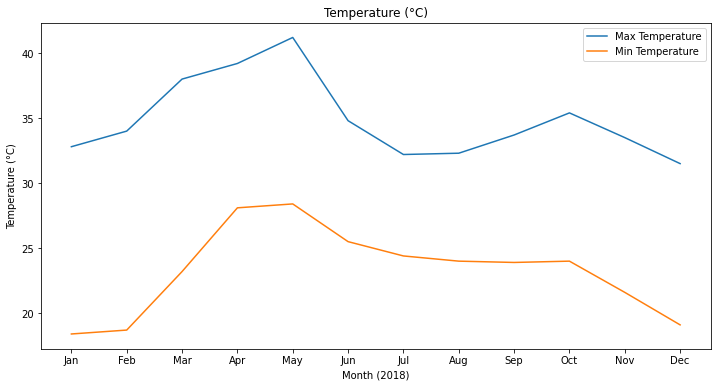

In [11]:
%%time
model.plot_temperature_max_min()
# appropriate temperature for crop? 15-35? Use Avg temperature

In [12]:
%%time
model.simple_label

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


['Irrigated', 'Rainfed']

In [ ]:
image_asset_id = ""
write_binary_version = False

test.write_image_asset(image_asset_id, write_binary_version)

In [ ]:
filename = ""
test.write_image_google_drive(filename)